In [1]:
# Import required libraries
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

## Textblob Implementation

In [85]:
# read the data into a pandas dataframe
restaurant_reviews = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
restaurant_reviews = restaurant_reviews.dropna()
restaurant_reviews.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
# Check the accuracy between liked column and the textblob results
pos_acc = 0
neg_acc = 0

for ind, review in restaurant_reviews.iterrows():
    analysis = TextBlob(review["Review"])
    if analysis.sentiment.polarity > 0:
        pos_acc = pos_acc+1 if review["Liked"] == 1 else pos_acc
            
    if analysis.sentiment.polarity <= 0:
        neg_acc = neg_acc+1 if review["Liked"] == 0 else neg_acc

all_pos = restaurant_reviews[restaurant_reviews['Liked']== 0].shape[0]
all_neg = restaurant_reviews[restaurant_reviews['Liked']== 1].shape[0]
print("Positive Accuracy is {}%".format(pos_acc/all_pos*100))
print("Negative Accuracy is {}%".format(neg_acc/all_neg*100))

Positive Accuracy is 78.8%
Negative Accuracy is 76.0%


In [4]:
# Add the textblob sentiment as an extra column to the reviews dataframe
textblob_ratings = []
for ind, review in restaurant_reviews.iterrows():
    analysis = TextBlob(review["Review"])
    if analysis.sentiment.polarity > 0:
        textblob_ratings.append(1)
            
    if analysis.sentiment.polarity <= 0:
        textblob_ratings.append(0)

if 'Textblob_Rating' not in restaurant_reviews.columns:
    restaurant_reviews.insert(2, "Textblob_Rating", textblob_ratings, True)
restaurant_reviews

,Review,Liked,Textblob_Rating
0,Wow... Loved this place.,1,1
1,Crust is not good.,0,0
2,Not tasty and the texture was just nasty.,0,0
3,Stopped by during the late May bank holiday of...,1,1
4,The selection on the menu was great and so wer...,1,1
...,...,...,...
995,I think food should have flavor and texture an...,0,0
996,Appetite instantly gone.,0,0
997,Overall I was not impressed and would not go b...,0,0
998,"The whole experience was underwhelming, and I ...",0,1


In [5]:
# Calculate the pearson correlation between the Liked and Textblob_Rating columns
pearson_correlation = restaurant_reviews.corr(method="pearson", numeric_only=True)
print("The pearson correlation between the Liked and Textblob_Rating columns is equal to {}"
      .format(pearson_correlation.loc['Liked', 'Textblob_Rating']))
pearson_correlation

The pearson correlation between the Liked and Textblob_Rating columns is equal to 0.5482149423943883


,Liked,Textblob_Rating
Liked,1.000000,0.548215
Textblob_Rating,0.548215,1.000000


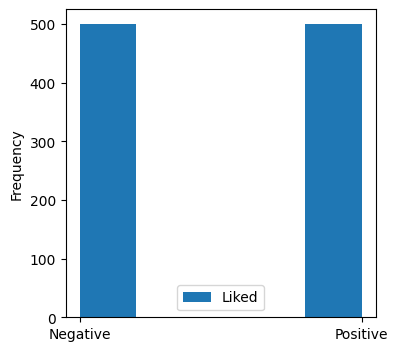

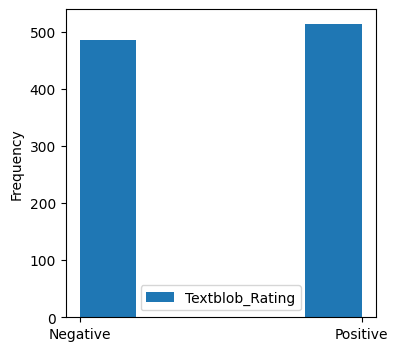

In [6]:
# Plot the two columns liked and Textblob_Rating
restaurant_reviews.plot.hist(column=["Liked"],bins=5, figsize=(4, 4))
plt.xticks([0,1], ["Negative","Positive"], x=2)

bx = restaurant_reviews.plot.hist(column=["Textblob_Rating"],bins=5, figsize=(4, 4))
plt.xticks([0,1], ["Negative","Positive"], x=2)

plt.show()

## Cosine Similarity Measurement

In [69]:
from scipy.spatial.distance import cdist
import matplotlib.gridspec as gridspec

positive_reviews = restaurant_reviews.where(restaurant_reviews["Liked"] == 1)
positive_reviews = positive_reviews.dropna()

negative_reviews = restaurant_reviews.where(restaurant_reviews["Liked"] == 0)
negative_reviews = negative_reviews.dropna()

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

fig = plt.figure()
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax3 = fig.add_subplot(gs[1, 0]) # row 1, span all columns

resulting_similarity_all = 1 - cdist(restaurant_reviews[["Liked","Textblob_Rating"]], restaurant_reviews[["Liked","Textblob_Rating"]],'cosine')
for sim in resulting_similarity_all:
    ax1.hist(sim[np.isfinite(sim)])
ax1.set_title('Cosine similarity of all reviews')
    
resulting_similarity_positive = 1 - cdist(positive_reviews[["Liked","Textblob_Rating"]], positive_reviews[["Liked","Textblob_Rating"]],'cosine')
for sim in resulting_similarity_positive:
    ax2.hist(sim[np.isfinite(sim)])
ax2.set_title('Cosine similarity of positive reviews')

resulting_similarity_negative = 1 - cdist(negative_reviews[["Liked","Textblob_Rating"]], negative_reviews[["Liked","Textblob_Rating"]],'cosine')
for sim in resulting_similarity_negative:
    ax3.hist(sim[np.isfinite(sim)])
ax3.set_title('Cosine similarity of negative reviews')
fig.tight_layout()

NameError: name 'restaurant_reviews' is not defined

## Compute the length of each review

In [8]:
# Add length of each review as a column to the dataframe
review_lengths = []
for ind, review in restaurant_reviews.iterrows():
    review_length = len(review["Review"])
    review_lengths.append(review_length)

if 'Review_Length' not in restaurant_reviews.columns:
    restaurant_reviews.insert(3, "Review_Length", review_lengths, True)
restaurant_reviews

,Review,Liked,Textblob_Rating,Review_Length
0,Wow... Loved this place.,1,1,24
1,Crust is not good.,0,0,18
2,Not tasty and the texture was just nasty.,0,0,41
3,Stopped by during the late May bank holiday of...,1,1,87
4,The selection on the menu was great and so wer...,1,1,59
...,...,...,...,...
995,I think food should have flavor and texture an...,0,0,66
996,Appetite instantly gone.,0,0,24
997,Overall I was not impressed and would not go b...,0,0,50
998,"The whole experience was underwhelming, and I ...",0,1,91


In [9]:
# Calculate the pearson correlation between the Liked and Review_length columns
pearson_correlation_review_length = restaurant_reviews.corr(method="pearson", numeric_only=True)
print("The pearson correlation between the Liked and Review_length columns is equal to {}"
      .format(pearson_correlation_review_length.loc['Liked', 'Review_Length']))
pearson_correlation_review_length

The pearson correlation between the Liked and Review_length columns is equal to -0.07528475029141274


,Liked,Textblob_Rating,Review_Length
Liked,1.000000,0.548215,-0.075285
Textblob_Rating,0.548215,1.000000,0.122055
Review_Length,-0.075285,0.122055,1.000000


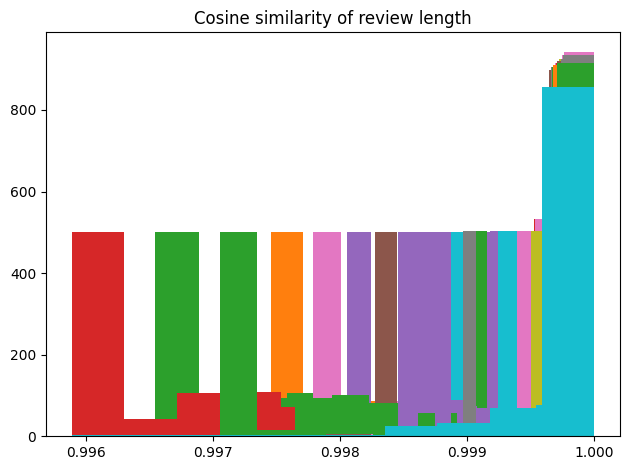

In [10]:
# Compute the cosine similarity between the Review_Length and the Liked columns
gs = gridspec.GridSpec(1, 1)

fig = plt.figure()
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0

resulting_similarity_review_length = 1 - cdist(restaurant_reviews[["Liked","Review_Length"]], restaurant_reviews[["Liked","Review_Length"]],'cosine')
for sim in resulting_similarity_review_length:
    ax1.hist(sim[np.isfinite(sim)])
ax1.set_title('Cosine similarity of review length')
fig.tight_layout()

## String matching method to classify reviews to topics

In [11]:
df_script = pd.read_excel("for_script.xlsx")
df_script = df_script.fillna(0)

df_script.head()

,vocabulary,price,quality,quantity,location
0,absolut,0.0,0.0,0.0,0.0
1,absolutley,0.0,0.0,0.0,0.0
2,accid,0.0,0.0,0.0,0.0
3,accommod,0.0,0.0,0.0,0.0
4,accomod,0.0,0.0,0.0,0.0


In [12]:
df_price = df_script[df_script["price"] == 1]
df_quality = df_script[df_script["quality"] == 1]
df_quantity = df_script[df_script["quantity"] == 1]
df_location = df_script[df_script["location"] == 1]

df_keywords = pd.concat([df_price,df_quality,df_quantity,df_location])
print(df_keywords.shape)
df_keywords.head(20)

(63, 5)


,vocabulary,price,quality,quantity,location
11,afford,1.0,0.0,0.0,0.0
174,buck,1.0,0.0,0.0,0.0
226,cheap,1.0,0.0,0.0,0.0
292,cost,1.0,0.0,0.0,0.0
380,discount,1.0,0.0,0.0,0.0
470,expens,1.0,0.0,0.0,0.0
493,fare,1.0,0.0,0.0,0.0
546,free,1.0,0.0,0.0,0.0
600,gratuiti,1.0,0.0,0.0,0.0
709,inexpens,1.0,0.0,0.0,0.0


In [13]:
import numpy as np

arr_price = np.asarray(df_price["vocabulary"])
arr_quality = np.asarray(df_quality["vocabulary"])
arr_quantity = np.asarray(df_quantity["vocabulary"])
arr_location = np.asarray(df_location["vocabulary"])

print(arr_price)
print(arr_quality)
print(arr_quantity)
print(arr_location)

['afford' 'buck' 'cheap' 'cost' 'discount' 'expens' 'fare' 'free'
 'gratuiti' 'inexpens' 'price' 'pricey' 'spend' 'worth']
['averag' 'bad' 'best' 'clean' 'creami' 'crispi' 'crumbi' 'crusti'
 'disgrac' 'disgust' 'dri' 'driest' 'eew' 'fine' 'flavorless' 'good'
 'great' 'greatest' 'horribl' 'nasti' 'nice' 'perfect' 'qualiti' 'sad'
 'salti' 'satifi' 'satisfi' 'tasti' 'yucki' 'yummi']
['amount' 'ampl' 'enough' 'gener' 'larg' 'larger' 'portion' 'quantiti'
 'small' 'smaller']
['airport' 'ambianc' 'ambienc' 'area' 'arriv' 'garden' 'joint' 'place'
 'quaint']


In [14]:
def handle_not(line:list):
    for token,i in zip(line,range(0,len(line))):
        if token == "not":
            if line[i+1] != None:
               if (line[i+1] == "good"):
                  line[i+1] = "bad"
               elif (line[i+1] == "bad"):
                  line[i+1] = "good"
               elif (line[i+1] == "tasty"):
                  line[i+1] = "bland"
               elif (line[i+1] == "bland"):
                  line[i+1] = "tasty"
               elif (line[i+1] == "clean"):
                  line[i+1] = "nasty"
               elif (line[i+1] == "nasty"):
                  line[i+1] = "clean"

    return line


restaurant_reviews["idx"] = 1
restaurant_reviews["idx"] = restaurant_reviews["idx"].cumsum()

reviews = restaurant_reviews["Review"]
opinion = restaurant_reviews["Liked"]
index = restaurant_reviews["idx"]

import string
from tkinter import W
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

sentence_all = list()
lines = reviews.to_list()

#lines = ["Program programmer AND Programming ... programmed"]

for line in lines:
    tokens = word_tokenize(line) #TOKENIZATION
    tokens = [w.lower() for w in tokens] #TO LOWERCASE
    table = str.maketrans('','',string.punctuation) #PUNCTUATION REMOVAL
    stripped = [w.translate(table) for w in tokens] #STRIPPING
    words = [word for word in stripped if word.isalpha()] #STRIPPING

    words = handle_not(words)

    stop_words = set(stopwords.words("english")) #STOPWORD REMOVAL
    words = [w for w in words if not w in stop_words] #STOPWORD REMOVAL

    for w,i in zip(words,range(0,len(words))): #Stemming
        w = PorterStemmer().stem(w)
        words[i] = w

    sentence_all.append(words)

print(reviews[0]," >> ",sentence_all[0])
print(reviews[1]," >> ",sentence_all[1])
print(reviews[2]," >> ",sentence_all[2])

Wow... Loved this place.  >>  ['wow', 'love', 'place']
Crust is not good.  >>  ['crust', 'bad']
Not tasty and the texture was just nasty.  >>  ['bland', 'textur', 'nasti']


In [15]:
price = []
quality = []
quantity = []
location = []



for i,line in zip(range(0,len(sentence_all)),sentence_all):
    price.append(0)
    quality.append(0)
    quantity.append(0)
    location.append(0)

    for token in line:
        for kw in arr_price:
            if token == kw:
                price[i] = 1
        for kw in arr_quality:
            if token == kw:
                quality[i] = 1
        for kw in arr_quantity:
            if token == kw:
                quantity[i] = 1
        for kw in arr_location:
            if token == kw:
                location[i] = 1


In [16]:
classified = {"idx":index,"price":price,"quality":quality,"quantity":quantity,"location":location}
df_classified = pd.DataFrame(classified)
df_classified.head()

,idx,price,quality,quantity,location
0,1,0,0,0,1
1,2,0,1,0,0
2,3,0,1,0,0
3,4,0,0,0,0
4,5,1,1,0,0


In [17]:
restaurant_reviews["price"] = price
restaurant_reviews["quality"] = quality
restaurant_reviews["quantity"] = quantity
restaurant_reviews["location"] = location

restaurant_reviews = restaurant_reviews.drop(columns=["idx"])

restaurant_reviews.head()

,Review,Liked,Textblob_Rating,Review_Length,price,quality,quantity,location
0,Wow... Loved this place.,1,1,24,0,0,0,1
1,Crust is not good.,0,0,18,0,1,0,0
2,Not tasty and the texture was just nasty.,0,0,41,0,1,0,0
3,Stopped by during the late May bank holiday of...,1,1,87,0,0,0,0
4,The selection on the menu was great and so wer...,1,1,59,1,1,0,0


## Alternative way of identifying reviews based on price, quality of food, quantity of food, and restaurant location using Word2Vec

In [18]:
import re
# We need this dataset in order to use the tokenizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Also download the list of stopwords to filter out
nltk.download('stopwords')
from nltk.corpus import stopwords

def process_text(text):
    # Make all the strings lowercase and remove non alphabetic characters
    text = re.sub('[^A-Za-z]', ' ', text.lower())

    # Tokenize the text; this is, separate every sentence into a list of words
    # Since the text is already split into sentences you don't have to call sent_tokenize
    tokenized_text = word_tokenize(text)

    # Remove the stopwords and stem each word to its root
    clean_text = [
        word for word in tokenized_text
        if word not in stopwords.words('english')
    ]

    # Remember, this final output is a list of words
    return clean_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bemob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bemob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
texts = [row["Review"] for ind, row in restaurant_reviews.iterrows()]
# texts = [" ".join(process_text(text)) for text in texts]
texts = [process_text(text) for text in texts]
flat_texts = [item for sublist in texts for item in sublist]
# Remove duplicates
flat_texts_corpus = list(dict.fromkeys(flat_texts))

In [20]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [21]:
# Define the topic keywords
price = "price"
quality = "quality"
quantity = "quantity"
location = "location"

In [22]:
keywords = [price, quality, quantity, location]

pairs = []
category_for_sentence = []
for text in texts:
    category_score = {price:0, quality:0,quantity:0,location:0}
    for word in text:
        for keyword in keywords:
            pairs.append((keyword, word))
    
    for w1, w2 in pairs:
        if w2 in wv:
            category_score[w1]+=wv.similarity(w1, w2)
            # print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))
    pairs = []
    category_for_sentence.append(category_score)

In [23]:
category_column=[]
topic_enum = {price:1, quality:2,quantity:3,location:4}
for cat in category_for_sentence:
    category_column.append(topic_enum[max(cat, key=cat.get)])
    
if 'Related_Topic' not in restaurant_reviews.columns:
    restaurant_reviews.insert(4, "Related_Topic", category_column, True)

## Wu Palmer Semantic Similarity

In [24]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet as wn

def penn_to_wn(tag):
    """ Convert between a Penn Treebank tag to a simplified Wordnet tag """
    if tag.startswith('N'):
        return 'n'
 
    if tag.startswith('V'):
        return 'v'
 
    if tag.startswith('J'):
        return 'a'
 
    if tag.startswith('R'):
        return 'r'
 
    return None

def tagged_to_synset(word, tag):
    wn_tag = penn_to_wn(tag)
    if wn_tag is None:
        return None
 
    try:
        return wn.synsets(word, wn_tag)[0]
    except:
        return None
    
def sentence_similarity_wu(sentence1, sentence2):
    """ compute the sentence similarity using Wordnet """
    # Tokenize and tag
    sentence1 = pos_tag(word_tokenize(sentence1))
    sentence2 = pos_tag(word_tokenize(sentence2))
 
    # Get the synsets for the tagged words
    synsets1 = [tagged_to_synset(*tagged_word) for tagged_word in sentence1]
    synsets2 = [tagged_to_synset(*tagged_word) for tagged_word in sentence2]

    # Filter out the Nones
    synsets1 = [ss for ss in synsets1 if ss]
    synsets2 = [ss for ss in synsets2 if ss]
 
    score, count = 0.0, 0
 
    # For each word in the first sentence
    for synset in synsets1:
        # Get the similarity value of the most similar word in the other sentence
        best_score = max([synset.wup_similarity(ss) for ss in synsets2])
 
        # Check that the similarity could have been computed
        if best_score is not None:
            score += best_score
            count += 1
 
    # Average the values
    score /= count
    return score

def symmetric_sentence_similarity_wu(sentence1, sentence2):
    """ compute the symmetric sentence similarity using Wordnet """
    return (sentence_similarity_wu(sentence1, sentence2) + sentence_similarity_wu(sentence2, sentence1)) / 2


In [25]:
# price_related_reviews = restaurant_reviews.where(restaurant_reviews["price"] == 1)
# price_related_reviews = price_related_reviews.dropna()
# restaurant_reviews.shape
price_wu_similarity = []
quality_wu_similarity = []
quantity_wu_similarity = []
location_wu_similarity = []
for ind, review in restaurant_reviews.iterrows():
    price_wu_similarity.append(symmetric_sentence_similarity_wu(review["Review"],"price"))
    quality_wu_similarity.append(symmetric_sentence_similarity_wu(review["Review"],"food quality"))
    quantity_wu_similarity.append(symmetric_sentence_similarity_wu(review["Review"],"food quantity"))
    location_wu_similarity.append(symmetric_sentence_similarity_wu(review["Review"],"restaurant location"))


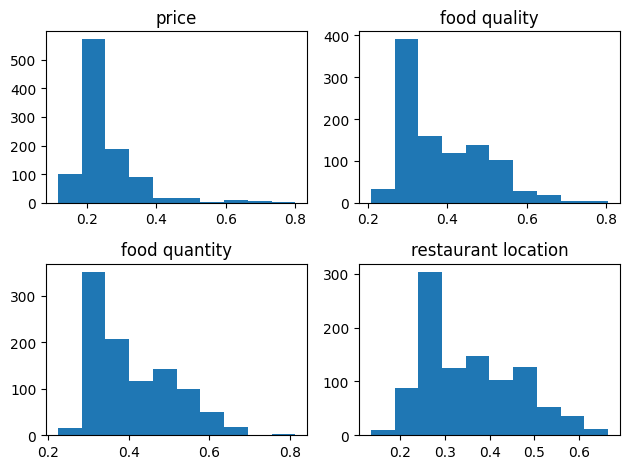

In [26]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure()
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax3 = fig.add_subplot(gs[1, 0]) # row 1, col 0
ax4 = fig.add_subplot(gs[1, 1]) # row 1, col 1

ax1.hist(price_wu_similarity, label="price")
ax1.set_title('price')
ax2.hist(quality_wu_similarity, label="food quality")
ax2.set_title('food quality')
ax3.hist(quantity_wu_similarity, label="food quantity")
ax3.set_title('food quantity')
ax4.hist(location_wu_similarity, label="restaurant location")
ax4.set_title('restaurant location')
fig.tight_layout()

## Compute categories using Empath

In [57]:
import pandas as pd

df = pd.read_excel("string_matched.xlsx")

df.head()

,Review,Liked,price,quality,quantity,location
0,Wow... Loved this place.,1,0,0,0,1
1,Crust is not good.,0,0,1,0,0
2,Not tasty and the texture was just nasty.,0,0,1,0,0
3,Stopped by during the late May bank holiday of...,1,0,0,0,0
4,The selection on the menu was great and so wer...,1,1,1,0,0


In [58]:
df_script = pd.read_excel("for_script.xlsx")
df_script = df_script.fillna(0)

df_price = df_script[df_script["price"] == 1]
df_quality = df_script[df_script["quality"] == 1]
df_quantity = df_script[df_script["quantity"] == 1]
df_location = df_script[df_script["location"] == 1]

import numpy as np

arr_price = list(df_price["vocabulary"])
arr_quality = list(df_quality["vocabulary"])
arr_quantity = list(df_quantity["vocabulary"])
arr_location = list(df_location["vocabulary"])

print(arr_price)
print(arr_quality)
print(arr_quantity)
print(arr_location)

['afford', 'buck', 'cheap', 'cost', 'discount', 'expens', 'fare', 'free', 'gratuiti', 'inexpens', 'price', 'pricey', 'spend', 'worth']
['averag', 'bad', 'best', 'clean', 'creami', 'crispi', 'crumbi', 'crusti', 'disgrac', 'disgust', 'dri', 'driest', 'eew', 'fine', 'flavorless', 'good', 'great', 'greatest', 'horribl', 'nasti', 'nice', 'perfect', 'qualiti', 'sad', 'salti', 'satifi', 'satisfi', 'tasti', 'yucki', 'yummi']
['amount', 'ampl', 'enough', 'gener', 'larg', 'larger', 'portion', 'quantiti', 'small', 'smaller']
['airport', 'ambianc', 'ambienc', 'area', 'arriv', 'garden', 'joint', 'place', 'quaint']


In [59]:
arr_price = list(arr_price)
print(type(arr_price))

<class 'list'>


In [60]:
from empath import Empath

lexicon = Empath()

lexicon.create_category("food-price",arr_price)
lexicon.create_category("food-quality",arr_quality)
lexicon.create_category("food-quantity",arr_quantity)
lexicon.create_category("restaurant-location",arr_location)

["afford", "cost", "money", "price", "costs", "worth", "budget", "sell", "pay", "paycheck", "insurance", "buy", "pay", "good_money", "cost", "salary", "more_money", "fortune", "cheap", "profit", "rent", "worth", "costing", "expenses", "costed", "wages", "allowance", "enough_money", "earn", "invest", "savings", "little_money", "income", "college_fund", "as_much_money", "bills", "paychecks", "cheaper", "discount", "tax", "that_much_money", "taxes", "extra_money", "guaranteed", "donate", "provide", "thousands_of_dollars", "purchase", "luxuries", "funds", "paid", "millions_of_dollars", "luxury", "sold", "supply", "work", "tuition", "mortgage", "own_money", "charity", "bankrupt", "so_much_money", "minimum_wage", "bank_account", "job", "pocket_money", "waste", "stocks", "expensive", "much_money", "fee", "repairs", "wage", "fund", "saving", "big_money", "trade", "qualify", "deposit", "how_much_money", "cheapest", "debt", "monthly", "a_hundred_dollars", "offer", "buying", "gamble", "decent_amo

In [72]:
emp_price = []
emp_quality = []
emp_quantity = []
emp_location = []

cat = ["food-price","food-quality","food-quantity","restaurant-location"]

reviews = df["Review"]

for line in reviews:

    curr = lexicon.analyze(line,cat)

    emp_price.append(curr["food-price"])
    emp_quality.append(curr["food-quality"])
    emp_quantity.append(curr["food-quantity"])
    emp_location.append(curr["restaurant-location"])

print(len(reviews))
print(len(emp_price))
print(len(emp_quality))
print(len(emp_quantity))
print(len(emp_location))

997
997
997
997
997


In [73]:
# pearson correlation of empath categories
liked = df["Liked"]

from numpy import corrcoef

print(corrcoef(liked,emp_price))
print(corrcoef(liked,emp_quality))
print(corrcoef(liked,emp_quantity))
print(corrcoef(liked,emp_location))

[[ 1.         -0.04992298]
 [-0.04992298  1.        ]]
[[1.         0.13680166]
 [0.13680166 1.        ]]
[[ 1.         -0.03288482]
 [-0.03288482  1.        ]]
[[1.         0.02695927]
 [0.02695927 1.        ]]


In [88]:
# Cosine Similarity
from scipy import spatial

result_price = 1 - spatial.distance.cosine(df["Liked"], emp_price)
result_quality = 1 - spatial.distance.cosine(df["Liked"], emp_quality)
result_quantity = 1 - spatial.distance.cosine(df["Liked"], emp_quantity)
result_location = 1 - spatial.distance.cosine(df["Liked"], emp_location)

print(result_price)
print(result_quality)
print(result_quantity)
print(result_location)

0.09670593264195138
0.4573633665873671
0.21644154091697776
0.24010933982831695


## Reimplementation of the above programs using SentiStrength

In [27]:
# Add SentiStrength column to dataframe
# DO NOT RUN AGAIN
# restaurant_reviews = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
# restaurant_reviews = restaurant_reviews.dropna()

# from sentistrength import PySentiStr

# senti = PySentiStr()
# senti.setSentiStrengthPath("./SentiStrength/SentiStrength.jar")
# senti.setSentiStrengthLanguageFolderPath('./SentiStrength/SentStrength_Data/') 

# sentistrength_rating = []
# for ind, review in restaurant_reviews.iterrows():
#     result = senti.getSentiment(review["Review"])
#     sentistrength_rating.append(result[0])

# restaurant_reviews["SentiStrength_Rating"] = sentistrength_rating

# from pathlib import Path  

# filepath = Path('./sentistrength_restaurant_reviews.csv')

# filepath.parent.mkdir(parents=True, exist_ok=True)  

# restaurant_reviews.to_csv(filepath,index=False)

In [26]:
sentistrength_restaurant_reviews = pd.read_csv('sentistrength_restaurant_Reviews.csv',sep=',')
sentistrength_restaurant_reviews = sentistrength_restaurant_reviews.dropna()
sentistrength_restaurant_reviews

,Review,Liked,SentiStrength_Rating
0,Wow... Loved this place.,1,3
1,Crust is not good.,0,0
2,Not tasty and the texture was just nasty.,0,-1
3,Stopped by during the late May bank holiday of...,1,3
4,The selection on the menu was great and so wer...,1,2
...,...,...,...
995,I think food should have flavor and texture an...,0,0
996,Appetite instantly gone.,0,0
997,Overall I was not impressed and would not go b...,0,0
998,"The whole experience was underwhelming, and I ...",0,0


In [75]:
# change sentistrength_rating column to binary 1 or 0 values
binary_rating = []
for ind, review in sentistrength_restaurant_reviews.iterrows():
    rating = (1 if review["SentiStrength_Rating"] > 0 else 0)

    binary_rating.append(rating)
sentistrength_restaurant_reviews["SentiStrength_Rating"] = binary_rating
sentistrength_restaurant_reviews

,Review,Liked,SentiStrength_Rating
0,Wow... Loved this place.,1,1
1,Crust is not good.,0,0
2,Not tasty and the texture was just nasty.,0,0
3,Stopped by during the late May bank holiday of...,1,1
4,The selection on the menu was great and so wer...,1,1
...,...,...,...
995,I think food should have flavor and texture an...,0,0
996,Appetite instantly gone.,0,0
997,Overall I was not impressed and would not go b...,0,0
998,"The whole experience was underwhelming, and I ...",0,0


In [77]:
# Pearson correlation
pearson_correlation = sentistrength_restaurant_reviews.corr(method="pearson", numeric_only=True)
print("The pearson correlation between the Liked and SentiStrength_Rating columns is equal to {}"
      .format(pearson_correlation.loc['Liked', 'SentiStrength_Rating']))
pearson_correlation

The pearson correlation between the Liked and SentiStrength_Rating columns is equal to 0.6184466798124914


,Liked,SentiStrength_Rating
Liked,1.000000,0.618447
SentiStrength_Rating,0.618447,1.000000


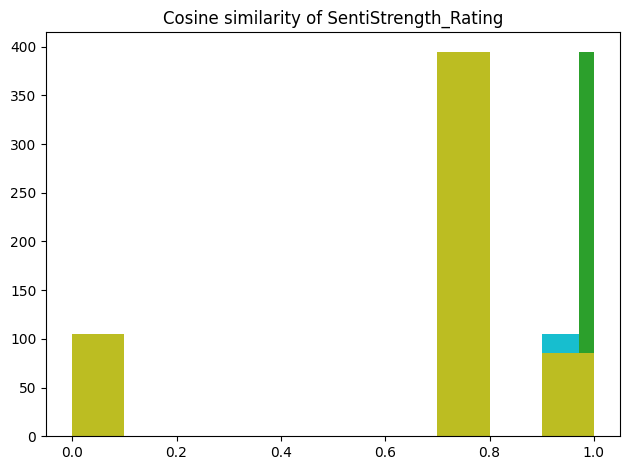

In [79]:
# Compute the cosine similarity between the SentiStrength_Rating and the Liked columns
gs = gridspec.GridSpec(1, 1)

fig = plt.figure()
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0

resulting_similarity_review_length = 1 - cdist(sentistrength_restaurant_reviews[["Liked","SentiStrength_Rating"]], sentistrength_restaurant_reviews[["Liked","SentiStrength_Rating"]],'cosine')
for sim in resulting_similarity_review_length:
    ax1.hist(sim[np.isfinite(sim)])
ax1.set_title('Cosine similarity of SentiStrength_Rating')
fig.tight_layout()

## Histogram of the 10 most common words in a dataset of missclassified reviews

In [28]:
# Get all missclassified reviews
misclassified_reviews = sentistrength_restaurant_reviews.where(sentistrength_restaurant_reviews["Liked"] != sentistrength_restaurant_reviews["SentiStrength_Rating"])
misclassified_reviews = misclassified_reviews.dropna()
misclassified_reviews

,Review,Liked,SentiStrength_Rating
7,The potatoes were like rubber and you could te...,0.0,1.0
10,Service was very prompt.,1.0,0.0
12,The cashier had no care what so ever on what I...,0.0,1.0
16,Highly recommended.,1.0,0.0
20,The Burrittos Blah!,0.0,1.0
...,...,...,...
949,"Maybe it's just their Vegetarian fare, but I'v...",0.0,1.0
952,The ambiance here did not feel like a buffet s...,0.0,1.0
973,The food wasn't good.,0.0,1.0
975,What happened next was pretty....off putting.,0.0,1.0


In [29]:
# Find the frequency of each word in the misclassified reviews
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')
frequency_dict = {}
for ind, review in misclassified_reviews.iterrows():
    review_words = review['Review'].lower().split()
    for word in review_words:
        if word not in STOP_WORDS and word.isalpha():
            if word in frequency_dict:
                frequency_dict[word]+=1
            else:
                frequency_dict[word] = 0

In [30]:
# Sort frequency_dict by value
import operator
sorted_frequency_dict = dict(sorted(frequency_dict.items(), key=operator.itemgetter(1),reverse=True))

ten_most_frequent_words = {}
ind = 0
for key, val in sorted_frequency_dict.items():
    ten_most_frequent_words[key] = val
    ind+=1
    if ind >= 10:
        break

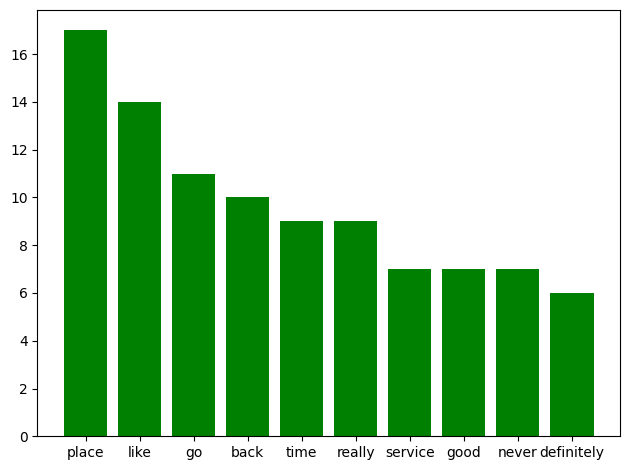

In [31]:
# Construct histogram of most frequent words in misclassified reviews
fig = plt.figure()
plt.bar(ten_most_frequent_words.keys(), ten_most_frequent_words.values(),  color='g')
fig.tight_layout()

## Build Sentiment Analysis Model using TfIdfVectorizer

In [32]:
# build training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(misclassified_reviews["Review"],misclassified_reviews["Liked"],
                                   random_state=104, 
                                   test_size=0.3, 
                                   shuffle=True)
X_train

680    I gave it 5 stars then, and I'm giving it 5 st...
739           Never had anything to complain about here.
7      The potatoes were like rubber and you could te...
575    The pizza tasted old, super chewy in not a goo...
110    REAL sushi lovers, let's be honest - Yama is n...
                             ...                        
41     There is not a deal good enough that would dra...
668    The owner used to work at Nobu, so this place ...
869    The feel of the dining room was more college c...
743    When I opened the sandwich, I was impressed, b...
340         the spaghetti is nothing special whatsoever.
Name: Review, Length: 133, dtype: object

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# reviews_before_vectorization = X_train.to_numpy()

vectorizer = TfidfVectorizer(analyzer='word', max_features= 1000,min_df=2,max_df=0.6)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [34]:
X_train_tfidf.shape

(133, 178)

In [35]:
# Create a naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [36]:
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

In [37]:
# get classification metrics
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.71      0.68      0.69        25
    Negative       0.76      0.79      0.78        33

    accuracy                           0.74        58
   macro avg       0.74      0.73      0.73        58
weighted avg       0.74      0.74      0.74        58



In [38]:
print("Confusion matrix: \n {}".format(metrics.confusion_matrix(y_test, y_pred)))

Confusion matrix: 
 [[17  8]
 [ 7 26]]


## Build Sentiment Analysis Model using FastText